# 🧪 Environment Test

## 🎯 Learning Objectives
- [ ] Verify all dependencies are installed
- [ ] Create your first sentence embeddings
- [ ] Visualize embedding space with UMAP
- [ ] Experience the "meaning is geometry" insight

## ⏱️ Estimated Time: 15-20 min

## 📚 Prerequisites
- `uv sync` completed successfully
- JupyterLab running

---

## 1. Verify Imports

Let's make sure all our dependencies are working.

In [1]:
# Core
import numpy as np
import torch
print(f"✓ NumPy {np.__version__}")
print(f"✓ PyTorch {torch.__version__}")
print(f"  CUDA available: {torch.cuda.is_available()}")

✓ NumPy 2.3.5
✓ PyTorch 2.9.1
  CUDA available: False


In [6]:
# Embeddings
from sentence_transformers import SentenceTransformer
print("✓ sentence-transformers")

✓ sentence-transformers


In [2]:
# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import umap
print("✓ matplotlib")
print("✓ plotly")
print("✓ UMAP")

✓ matplotlib
✓ plotly
✓ UMAP


In [3]:
# Clustering
import hdbscan
from sklearn.metrics.pairwise import cosine_similarity
print("✓ HDBSCAN")
print("✓ scikit-learn")

✓ HDBSCAN
✓ scikit-learn


In [4]:
# Data
import pandas as pd
print(f"✓ pandas {pd.__version__}")

✓ pandas 2.3.3


**If all cells above ran without errors, your environment is ready!** 🎉

---

## 2. First Embeddings

Let's embed some sentences and see what happens.

In [7]:
# Load a sentence transformer model
# First run will download the model (~90MB)
model = SentenceTransformer('all-MiniLM-L6-v2')
print(f"Model loaded! Embedding dimension: {model.get_sentence_embedding_dimension()}")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model loaded! Embedding dimension: 384


In [8]:
# Define some sentences with clear semantic groups
sentences = [
    # Animals
    "The cat sat on the mat.",
    "Dogs are loyal companions.",
    "My pet hamster runs on a wheel.",
    "Birds fly south for the winter.",
    
    # Technology
    "Python is a popular programming language.",
    "Machine learning models need lots of data.",
    "The server crashed unexpectedly last night.",
    "Docker containers simplify deployment.",
    
    # Food
    "I love eating pizza on Fridays.",
    "Fresh vegetables are good for health.",
    "The chef prepared a delicious meal.",
    "Coffee keeps me awake in the morning.",
    
    # Sports
    "The basketball game was exciting.",
    "Running a marathon requires training.",
    "Swimming is great exercise.",
    "The soccer team won the championship.",
]

# Assign labels for visualization
labels = [
    "Animals", "Animals", "Animals", "Animals",
    "Technology", "Technology", "Technology", "Technology",
    "Food", "Food", "Food", "Food",
    "Sports", "Sports", "Sports", "Sports",
]

print(f"Prepared {len(sentences)} sentences in {len(set(labels))} categories")

Prepared 16 sentences in 4 categories


In [9]:
# Embed the sentences
embeddings = model.encode(sentences, show_progress_bar=True)
print(f"Embeddings shape: {embeddings.shape}")
print(f"Each sentence is now a {embeddings.shape[1]}-dimensional vector!")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embeddings shape: (16, 384)
Each sentence is now a 384-dimensional vector!


### Quick Check: Similarity

Let's verify that similar sentences have similar embeddings.

In [10]:
# Compute cosine similarity between first sentence and all others
first_sentence = sentences[0]
similarities = cosine_similarity([embeddings[0]], embeddings)[0]

print(f"Similarity to: \"{first_sentence}\"\n")
for sent, sim, label in sorted(zip(sentences, similarities, labels), key=lambda x: -x[1]):
    print(f"  {sim:.3f} [{label:10}] {sent[:50]}...")

Similarity to: "The cat sat on the mat."

  1.000 [Animals   ] The cat sat on the mat....
  0.280 [Animals   ] My pet hamster runs on a wheel....
  0.159 [Animals   ] Dogs are loyal companions....
  0.104 [Technology] The server crashed unexpectedly last night....
  0.083 [Food      ] Coffee keeps me awake in the morning....
  0.055 [Sports    ] The soccer team won the championship....
  0.037 [Food      ] I love eating pizza on Fridays....
  0.032 [Food      ] The chef prepared a delicious meal....
  0.025 [Technology] Python is a popular programming language....
  0.009 [Animals   ] Birds fly south for the winter....
  0.004 [Technology] Docker containers simplify deployment....
  -0.047 [Technology] Machine learning models need lots of data....
  -0.048 [Sports    ] The basketball game was exciting....
  -0.061 [Sports    ] Swimming is great exercise....
  -0.072 [Sports    ] Running a marathon requires training....
  -0.119 [Food      ] Fresh vegetables are good for health....


**Notice**: The most similar sentences are other animal-related sentences! The embedding captured semantic meaning.

---

## 3. Visualize with UMAP

Our embeddings are 384-dimensional. Let's project to 2D to see the structure.

In [11]:
# Reduce dimensions with UMAP
reducer = umap.UMAP(
    n_components=2,
    n_neighbors=5,      # Small because we have few points
    min_dist=0.3,
    metric='cosine',
    random_state=42
)

embeddings_2d = reducer.fit_transform(embeddings)
print(f"Reduced to shape: {embeddings_2d.shape}")

/Users/peleke/Documents/Projects/aegir/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Reduced to shape: (16, 2)


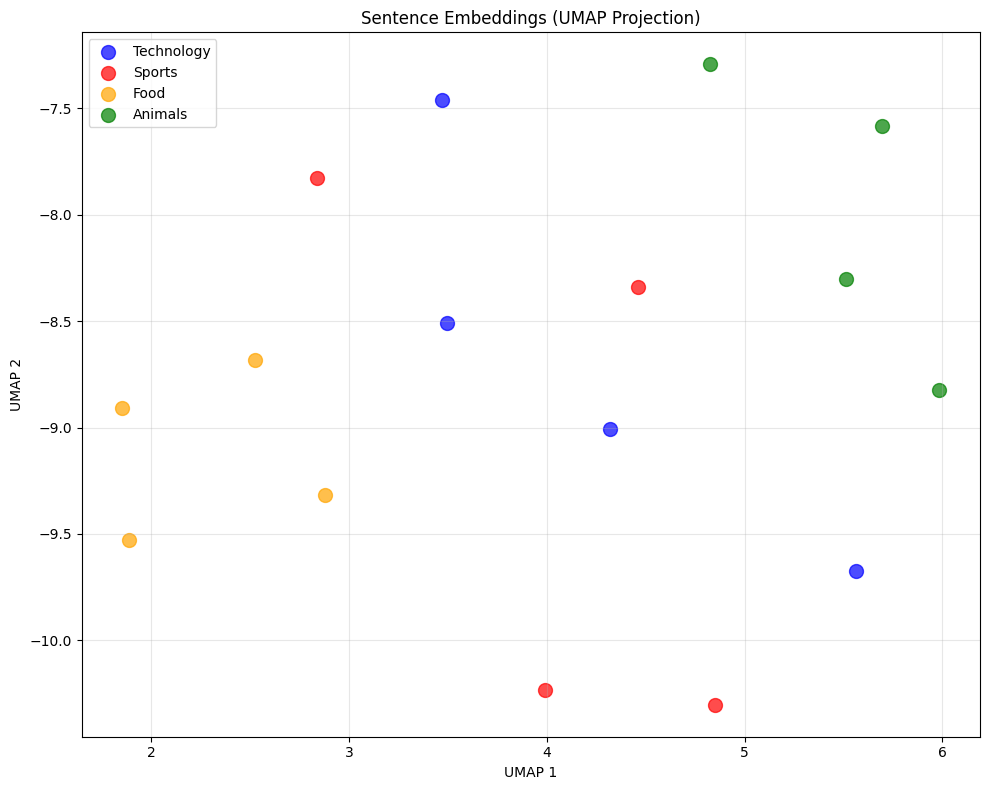

In [12]:
# Static plot with matplotlib
plt.figure(figsize=(10, 8))

# Color by category
colors = {'Animals': 'green', 'Technology': 'blue', 'Food': 'orange', 'Sports': 'red'}
for label in set(labels):
    mask = [l == label for l in labels]
    plt.scatter(
        embeddings_2d[mask, 0],
        embeddings_2d[mask, 1],
        c=colors[label],
        label=label,
        s=100,
        alpha=0.7
    )

plt.legend()
plt.title('Sentence Embeddings (UMAP Projection)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Look at that!** Similar sentences cluster together. This is the foundation of everything we'll build.

---

## 4. Interactive Visualization (Bonus)

Let's make it interactive so you can hover over points to see the sentences.

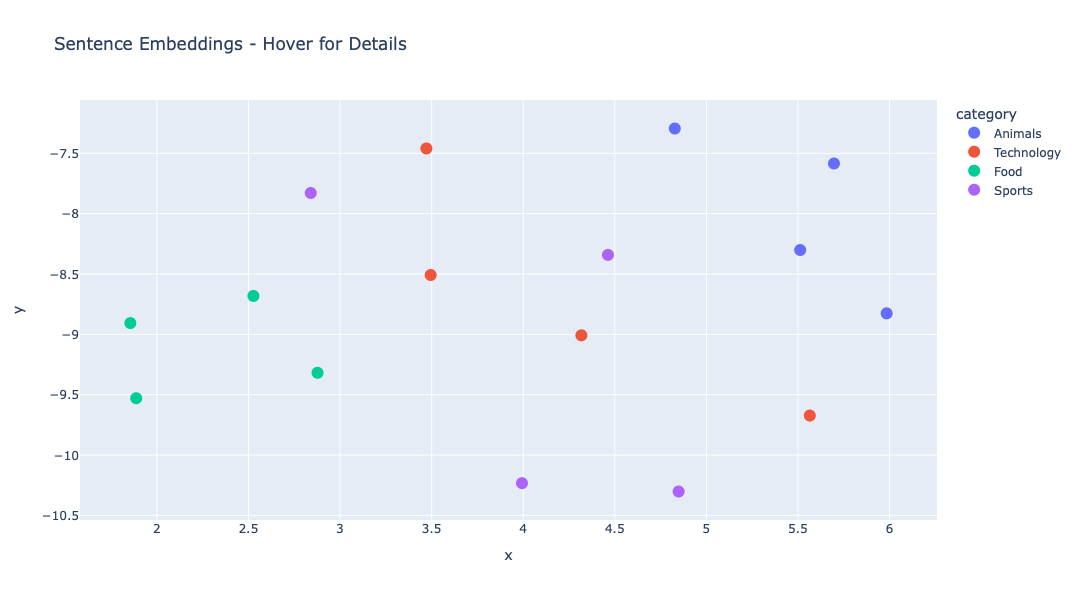

In [13]:
# Create DataFrame for Plotly
df = pd.DataFrame({
    'x': embeddings_2d[:, 0],
    'y': embeddings_2d[:, 1],
    'sentence': sentences,
    'category': labels
})

# Interactive plot
fig = px.scatter(
    df, 
    x='x', 
    y='y',
    color='category',
    hover_data=['sentence'],
    title='Sentence Embeddings - Hover for Details',
    width=800,
    height=600
)

fig.update_traces(marker=dict(size=12))
fig.show()

**Hover over points** to see the sentences. Notice how semantic clusters emerge naturally!

---

## 5. Quick Clustering Preview

Let's see if we can automatically discover these categories.

In [14]:
# Run HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, metric='euclidean')
cluster_labels = clusterer.fit_predict(embeddings)

print(f"Found {len(set(cluster_labels)) - 1} clusters (plus noise)")
print(f"Cluster assignments: {cluster_labels}")

Found 0 clusters (plus noise)
Cluster assignments: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


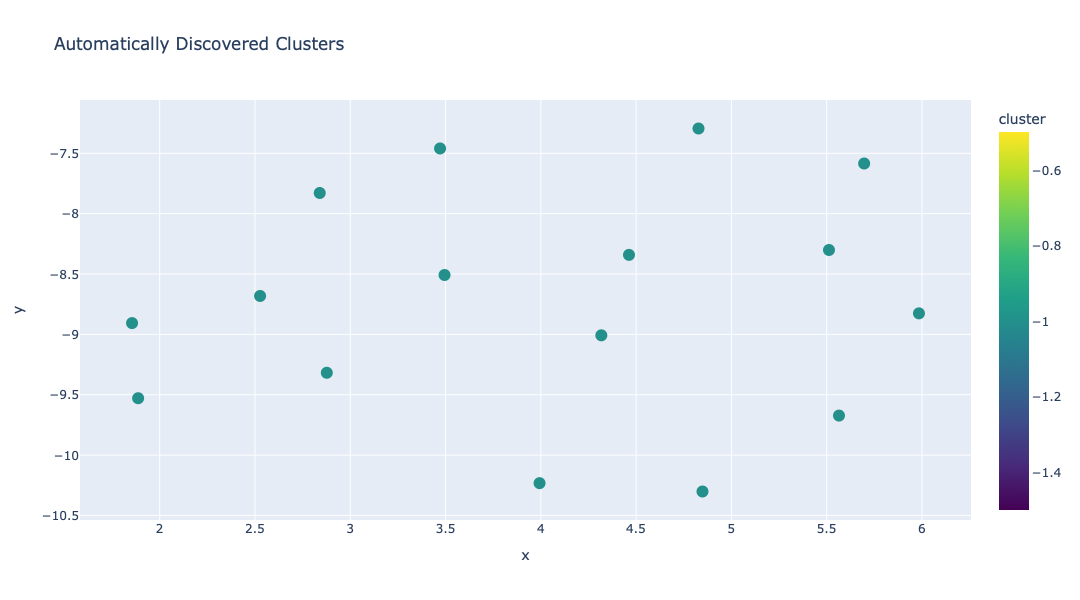

In [15]:
# Visualize clusters
df['cluster'] = cluster_labels

fig = px.scatter(
    df, 
    x='x', 
    y='y',
    color='cluster',
    hover_data=['sentence', 'category'],
    title='Automatically Discovered Clusters',
    width=800,
    height=600,
    color_continuous_scale='viridis'
)

fig.update_traces(marker=dict(size=12))
fig.show()

**The algorithm found meaningful clusters without being told the categories!**

This is **concept emergence** — exactly what we'll explore in Week 4.

---

## 📝 Key Takeaways

1. **Embeddings capture meaning**: Similar sentences → similar vectors
2. **Geometry encodes semantics**: Categories form clusters in embedding space
3. **Concepts can emerge**: Clustering finds structure without labels

This is the foundation of everything we'll build in Aegir!

---

## 🎮 Challenge (Optional)

Try adding your own sentences! What clusters do they join?

In [ ]:
# Your sentences here
my_sentences = [
    "Replace this with your own sentence!",
    # Add more...
]

# Embed and find nearest
my_embeddings = model.encode(my_sentences)

for sent, emb in zip(my_sentences, my_embeddings):
    sims = cosine_similarity([emb], embeddings)[0]
    best_idx = sims.argmax()
    print(f"\n'{sent[:50]}...'")
    print(f"  → Most similar to: '{sentences[best_idx][:50]}...' ({labels[best_idx]})")

---

## 🔗 Next Up

→ [Week 1: Foundations](../../syllabus/week-01-foundations.md) - NumPy, PyTorch, linear algebra, calculus

---

## 🐇 Rabbit Holes (Optional)

- [How do sentence transformers work?](../wiki/embeddings.md)
- [What is UMAP actually doing?](https://arxiv.org/abs/1802.03426)
- [Why cosine similarity?](https://en.wikipedia.org/wiki/Cosine_similarity)